<h1><center>CMPE 462 - Project 1<br>Binary Classification with Logistic Regression<br>Due: April 23, 2020, 23:59</center></h1>

* **Student ID1: 2015300084**
* **Student ID2:  2015401183**

# Overview

In this project, you are going to implement logistic regression from scratch. You are provided
a subset of the famous handwritten digit dataset called MNIST. In the subset, you will find images of digit 1 and 5. Therefore, you will be solving a binary classification problem. The project includes feature extraction, model training, and evaluation steps.

First, you will load and visualize the data portion we have provided to you and then extract two different set of features to build a classifier on. When you extracted the desired features, you will run your logistic regression implementation with gradient descent on the representations to classify digits into 1 and 5. You will experiment with different learning rates  and regularization parameter ($\lambda$) and find the optimal $\lambda$ with 5-fold cross validation. Finally, you will evaluate the implemented models, decide which is the best performing one and visualize a decision boundary.

Follow the steps on this notebook that would guide you through the solution step-by-step. Make sure that the notebook reports your work properly and add comments and opinions when necessary.

**IMPORTANT NOTE:** You are allowed to use third-party libraries such as `numpy` and `matplotlib` to help you implement necessary procedures. However, you should not import any function that accomplishes the task itself. For instance, you can use `numpy` arrays for matrix operations, but you cannot use `scikit-learn` to implement cross validation.

# Task 1: Feature Extraction (35 Pts)

## Task 1.1: Display

Load the training/test data and labels as numpy arrays (Hint:`np.load`). Train and test data are 1561x256 and 424x256 dimensional matrices, respectively. Each row in the
aforementioned matrices corresponds to an image of a digit. The 256 pixels correspond to a 16x16 image. Label 1 is assigned to digit 1 and label -1 is assigned to digit 5.

## (Important) folder path should be changed according to computer

In [1]:
#numpy and matplotlib libraries are included
import numpy as np
import matplotlib.pyplot as plt

#training data, test data, training label and test label from the data folder 
#folder path should be changed according to the computer
training_data=np.load('D:/dersler/cmpe462/project1/data/train_data.npy') 
test_data=np.load('D:/dersler/cmpe462/project1/data/test_data.npy')
training_label=np.load('D:/dersler/cmpe462/project1/data/train_labels.npy')
test_label=np.load('D:/dersler/cmpe462/project1/data/test_labels.npy')

**(5 points)** Display two of the digit images, one for digit 1 and one for digit 5. You can use `imshow` function of `matplotlib` library with a suitable colormap. You will first need to reshape 256 pixels to a 16x16 matrix. 

**Digit 1**

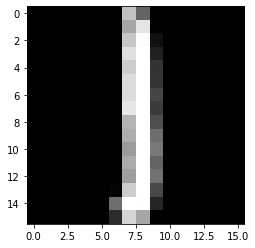

In [2]:
#digit 1
digit1=training_data[0] 
digit1.resize((16,16)) 
plt.imshow(digit1,cmap='gray',interpolation='none')


**Digit 5**

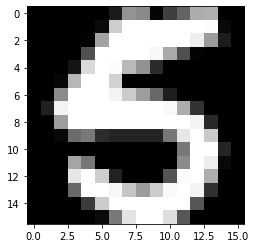

In [3]:
#digit 5
digit5=training_data[1500] 
digit5.resize((16,16))
plt.imshow(digit5,cmap='gray',interpolation='none')

## Task 1.2: Representation 1

**(10 points) Implementing Representation 1:** Extract the **symmetry** and **average intensity** features discussed in the class (see logistic regression lecture notes). To compute the intensity features, compute the average pixel value of the image, and for the symmetry feature, compute the negative of the norm of the difference between the image and its y-axis symmetrical. Search numpy's documentation to find the suitable function at each step. You should extract these two features for each image in the training and test sets. As a result, you should obtain a training data matrix of size 1561x2 and test data matrix of size 424x2.

Throughout the notebook, we will refer the representation with these two features as **Representation 1** 

**Average Intensity Feature**

In [4]:
training_data_mean =training_data.mean(1)
test_data_mean = test_data.mean(1)

**Symmetry Feature**

In [5]:
training_data_3d = np.resize(training_data,(1561,16,16)) #2D training data is converted to 3D data 
training_data_3d_sym_matrix = np.flip(training_data_3d,2) #it's y-axis symmetrical

test_data_3d = np.resize(test_data,(424,16,16)) #2D training data is converted to 3D data 
test_data_3d_sym_matrix = np.flip(test_data_3d,2) #it's y-axis symmetrical

In [6]:
training_data_diff = np.subtract(training_data_3d,training_data_3d_sym_matrix) #the difference between the image and its y-axis symmetrical
test_data_diff = np.subtract(test_data_3d,test_data_3d_sym_matrix)#the difference between the image and its y-axis symmetrical.

#for negative of the norm of the difference
training_data_diff=training_data_diff*training_data_diff#square of each elements for the norm
test_data_diff=test_data_diff*test_data_diff#square of each elements for the norm

training_data_sym = -np.sqrt(np.sum(np.sum(training_data_diff,axis = 1),axis = 1))#minus square of the summations of each elements
test_data_sym = -np.sqrt(np.sum(np.sum(test_data_diff,axis = 1),axis = 1))#minus square of the summations of each elements

In [7]:
#feature 1 and feature 2 are Concatenated for the data matrices
# [x1 x2]
#training data matrix 1561x2
training_data_rep1 = np.concatenate((np.resize(training_data_mean,(1561,1)), np.resize(training_data_sym,(1561,1))), axis=1) 
#test data matrix 424x2
test_data_rep1 = np.concatenate((np.resize(test_data_mean,(424,1)), np.resize(test_data_sym,(424,1))), axis=1)  

In [8]:
#training_data_rep1 #to check training data for the representation 1

In [9]:
#test_data_rep1 #to check test data for the representation 1

## Task 1.3: Plots for Representation 1

**(5 points)** Provide two scatter plots, one for training and one for test data. The plots should contain the average intensity values in the x-axis and symmetry values in the
y-axis. Denote the data points of label 1 with blue marker shaped <font color='blue'>o</font> and the data points of label -1 with a red marker shaped <font color='red'>x</font>. (Hint: check out `plt.scatter` and its `marker` and `color` parameters). Explicitly state the axis labels and figure title for both plots (Hint: `plt.xlabel`, `plt.ylabel`, `plt.title`). 

**Scatter Plot for Training Data (Representation 1)**

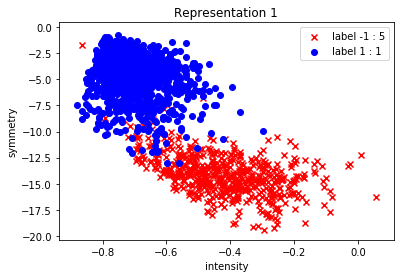

In [10]:
plt.scatter(training_data_mean[training_label==-1],training_data_sym[training_label==-1],marker='x',color='red')
plt.scatter(training_data_mean[training_label==1],training_data_sym[training_label==1],marker='o',color='blue')
plt.xlabel("intensity")
plt.ylabel("symmetry")
plt.title("Representation 1")
plt.legend(["label -1 : 5","label 1 : 1"])

**Scatter Plot for Test Data (Representation 1)**

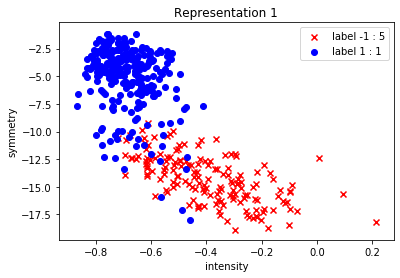

In [11]:
plt.scatter(test_data_mean[test_label==-1],test_data_sym[test_label==-1],marker='x',color='red')
plt.scatter(test_data_mean[test_label==1],test_data_sym[test_label==1],marker='o',color='blue')
plt.xlabel("intensity")
plt.ylabel("symmetry")
plt.title("Representation 1")
plt.legend(["label -1 : 5","label 1 : 1"])

## Task 1.4: Representation 2

**(15 points) Implementing Representation 2:** Come up with an alternative feature extraction approach. The features can again be 2-D, or higher dimensional. If you use any external resource, please cite the references. Explain the feature extraction procedure clearly in your report; if it is an algorithm, provide the algorithm; if it is a function, provide the mathematical expressions. 

If your proposed features are 2-D or 3-D, provide the scatter plots similar to the previous step.

We will refer this representation proposed by you as **Representation 2**.

**Feature 1**: Standard Deviation with respect to y axis for each binary images
<br>
Each image is converted to binary image using its pixels values. If a pixel value is positive, it becomes +1, otherwise it becomes 0. These pixels with +1 are indexed according to their columns (The index of the pixels at the first columns is 1, not 0) and the standart deviations are calculated for each image.
<br>
<br>
sample image: $\begin{bmatrix} -0.3 & 0.8 & -0.7 \\ 0.1 & 0.9 & -0.8 \\ 0 & 0.9 & 0.5 \end{bmatrix}$ 
binary image: $\begin{bmatrix} 0 & 1 & 0 \\ 1 & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix}$ 
indexed image: $\begin{bmatrix} 0 & 2 & 0 \\ 1 & 2 & 0 \\ 0 & 2 & 3 \end{bmatrix}$ 
cluster: $ {1,2,2,2,3}$
std = 0.7


In [12]:
training_data_binary_3d = training_data_3d>0 #binary images
test_data_binary_3d = test_data_3d>0

#the summation of each column to find how many pixels with +1 value at the columns there are
training_data_binary_sum = np.sum(training_data_binary_3d,axis=1)
test_data_binary_sum = np.sum(test_data_binary_3d,axis=1)

In [13]:
#initialization of standard deviation vectors for the images
training_x_cluster_std= np.zeros((1561,1))
test_x_cluster_std= np.zeros((424,1))

In [14]:
for i in range (1561): #for each image at training data
    temp_sub_cluster = [] #initial empty cluster for the image
    for j in range (16): #for each column
        for k in range (training_data_binary_sum[i][j]):#for each pixel at this column
            temp_sub_cluster.append(j+1) #its index is added to the cluster for this image
    training_x_cluster_std[i] = np.std(temp_sub_cluster) #std calculation for this image and it's added to std vector

In [15]:
for i in range (424): #for each image at test data
    temp_sub_cluster = [] #initial empty cluster for the image
    for j in range (16): #for each column
        for k in range (test_data_binary_sum[i][j]):#for each pixel at this column
            temp_sub_cluster.append(j+1) #its index is added to the cluster for this image
    test_x_cluster_std[i] = np.std(temp_sub_cluster)#std calculation for this image and it's added to std vector

**Feature 2**

In [16]:
blackratios_train=np.empty(1561)
for i in range(1561):
    black=0
    for j in range(256):
        if j%16==2 and  training_data[i][j]==-1:
            black=black+1
        if j%16==3 and  training_data[i][j]==-1:
            black=black+1
        if j%16==4 and  training_data[i][j]==-1:
            black=black+1
        if j%16==5 and  training_data[i][j]==-1:
            black=black+1
        if j%16==10 and  training_data[i][j]==-1:
            black=black+1
        if j%16==11 and  training_data[i][j]==-1:
            black=black+1
        if j%16==12 and  training_data[i][j]==-1:
            black=black+1
        if j%16==13 and  training_data[i][j]==-1:
            black=black+1
        
    blackratios_train[i]=black/128
   

In [17]:
blackratios_test=np.empty(424)

for i in range(424):
    white=0
    black=0
    for j in range(256):
        if j%16==2 and  test_data[i][j]==-1:
            black=black+1
        if j%16==3 and  test_data[i][j]==-1:
            black=black+1
        if j%16==4 and  test_data[i][j]==-1:
            black=black+1
        if j%16==5 and  test_data[i][j]==-1:
            black=black+1
        if j%16==10 and  test_data[i][j]==-1:
            black=black+1
        if j%16==11 and  test_data[i][j]==-1:
            black=black+1
        if j%16==12 and  test_data[i][j]==-1:
            black=black+1
        if j%16==13 and  test_data[i][j]==-1:
            black=black+1
        
    blackratios_test[i]=black/128
    

In [18]:
#feature 1 and feature 2 are Concatenated for the data matrices
# [x1 x2]
#training data matrix 1561x2
training_data_rep2 = np.concatenate((np.resize(blackratios_train,(1561,1)), np.resize(training_x_cluster_std,(1561,1))), axis=1) 
#test data matrix 424x2
test_data_rep2 = np.concatenate((np.resize(blackratios_test,(424,1)), np.resize(test_x_cluster_std,(424,1))), axis=1)  

## Task 1.5: Plots for Representation 2

**Scatter Plot for Training Data (Representation 2)**

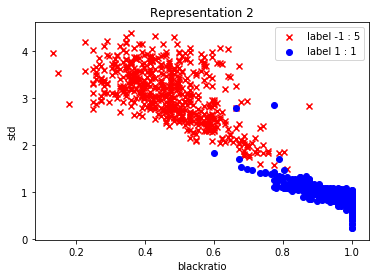

In [19]:
plt.scatter(blackratios_train[training_label==-1],training_x_cluster_std[training_label==-1],marker='x',color='red')
plt.scatter(blackratios_train[training_label==1],training_x_cluster_std[training_label==1],marker='o',color='blue')
plt.xlabel("blackratio")
plt.ylabel("std")
plt.title("Representation 2")
plt.legend(["label -1 : 5","label 1 : 1"])

**Scatter Plot for Test Data (Representation 2)**

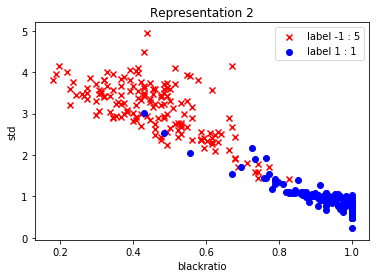

In [20]:
plt.scatter(blackratios_test[test_label==-1],test_x_cluster_std[test_label==-1],marker='x',color='red')
plt.scatter(blackratios_test[test_label==1],test_x_cluster_std[test_label==1],marker='o',color='blue')
plt.xlabel("blackratio")
plt.ylabel("std")
plt.title("Representation 2")
plt.legend(["label -1 : 5","label 1 : 1"])

# Task 2: Logistic Regression (40 Pts)

## Task 2.1: Logistic Regression

**(20 points)** Implement the logistic regression classifier from scratch with gradient descent and train it using Representation 1 and Representation 2 as inputs. Concatenate
1 to your features for the intercept term, such that one data point will look like for 2-D features [1,$x_1$,$x_2$], and the model vector will be [$w_0, w_1, w_2$], where $w_0$ is the intercept parameter. 
You can refer to lecture notes (Logistic regression slides 29-30) to review the gradient descent learning algorithm and the logistic loss. To implement the gradient of the logistic loss with respect to $w$, first derive its expression by hand. Please include your derivation in your report.

To prove that your implementation is converging, keep the loss values at each gradient descent iteration in a numpy array. After the training is finalized, plot the loss values
with respect to iteration count (Hint: `plt.plot`). You should observe a decreasing loss as the number of iterations increases. Also, experiment with 5 different learning rates between 0 and 1, and plot the convergence curves for each learning rate in the same plot to observe the effect of the learning rate (step size) on the convergence. 

To decide when to terminate the gradient descent iterations, check the absolute difference between the current loss value and the loss value of the previous step. If the difference is less than a small number, such as $10^{-5}$, you can exit the loop.

### Function Definitions for Logistic Regression

#### Logistic Loss Function:  
\begin{equation}
     E(w) = \frac{1}{N}\sum_{i=1}^{N}\ln{(1+e^{-y_{n}w^{T}x_{n}})}
    {\label{loss}}
\end{equation}

In [21]:
#takes x(data), w(weight), y(label) and return loss value.
def logistic_loss_function(x,w,y):
    return np.mean(np.log(np.exp(np.multiply(-y,np.dot(x,w)))  + 1))

#### The Gradient of Logistic Loss Function
\begin{equation}
     \frac{\partial E(w)}{\partial w}   =\frac{1}{N}\sum_{i=1}^{N} \frac{-y_{n}x_{n}}{e^{y_{n}w^{T}x_{n}}+1}
    {\label{gradient}}
\end{equation}

In [22]:
#takes x(data), w(weight), y(label) and return gradient vector. (the direction with the most increasing)
def gradient_loss_function(x,w,y): 
    return np.resize(np.mean(np.multiply(-y,x)/(np.exp(np.multiply(y,np.dot(x,w)))  + 1),0),(3,1))

#### Logistic Regression Function

In [23]:
#takes x(data), w(weight), y(label), step size(learning rate), error size(for the convergence) and 
#return last weight matrix, loss values vector for each iteration
def logistic_regression(x,w,y,step_size,error_size):
    convergence_size = error_size + 1 #initialization of convergence size, assigned to a number higher than error_size
    temp_loss =  logistic_loss_function(x,w,y)#temporary loss for initial weight matrix
    loss_values = temp_loss #loss values vector is initialized and initial loss value is added to the vector
    while convergence_size > error_size: #while convergence is not enough
        grad = gradient_loss_function(x,w,y) #gradient vector
        direction = -grad #minus gradient vector for the vector through the local minimum
        w = w + step_size*direction #weight update
        prev_loss = temp_loss #previous loss value is saved to check convergence before new loss value calculation 
        temp_loss = logistic_loss_function(x,w,y)#new loss value after weight update at this iteration
        loss_values = np.append(loss_values,temp_loss)#new loss value is added to the loss value vector
        convergence_size = abs(prev_loss - temp_loss)#convergence size calculation
    return w,loss_values

#### Sigmoid Function
\begin{equation}
  \begin{split}
    S(x) = \frac{1}{1+e^{-x}}
    {\label{sigmoid}}
    \end{split}
\end{equation}

In [24]:
def sigma(s):
    return 1/(1+np.exp(-s))

#### Hypothesis Function
\begin{equation}
    H(x,w) = S(x^{T}w) = \frac{1}{1+e^{-x^{T}w}}
    {\label{hyp}}
\end{equation}

In [25]:
def h_function(x,w):
    return sigma(np.dot(x,w))

#### Estimation Function
\begin{array}{ll}
Label 1 &  \mbox {if } H(x,w) >0.5
\cr
Label -1  &  \mbox {if } H(x,w) <= 0.5
\end{array}

In [26]:
def estimation(x,w):
    if h_function(x,w) > 0.5:
        return 1
    else:
        return -1

#### Accuracy Function
 \begin{equation}
    accuracy = \frac{\#correct \ estimation}{\#total \ estimation}
    {\label{accuracy}}
  \end{equation}

In [27]:
#takes data matrix(x), weight matrix(w), label(y) and return accuracy value
def accuracy_function(data,w,label):
    data_size = len(data) #number of rows (number of samples) = m
    result = np.ones((data_size,1)) #result vector for each sample
    for i in range (data_size):
        result[i] = estimation(data[i],w)*label[i]
        #estimation value * label value, if the estimation is correct, result is 1 (1*1 or -1*-1 = 1); otherwise -1 
    return sum(result==1)/data_size #the ratio of correct estimation to the number of samples

### Representation 1

In [28]:
#x1 matrix is created by concatenating 1's vector and training data for representation 1 ( [1 feature_1 feature_2] for one sample)
# 1561x3
x1 = np.concatenate((np.ones((1561,1)),training_data_rep1),axis = 1)
#y matrix 
#1561x1
y = np.resize(training_label,(1561,1))
#random initial weight matrix
#3x1
w =np.zeros((3,1))

In [29]:
#x1 #to check x1

In [30]:
#y #to check y

In [31]:
#w #to check initial weight

In [32]:
#step sizes for the evaluation
step_size1 = 0.0009
step_size2 = 0.003
step_size3 = 0.009
step_size4 = 0.03
step_size5 = 0.09

step_sizes = np.zeros((5,1))
step_sizes[0] = step_size1
step_sizes[1] = step_size2
step_sizes[2] = step_size3
step_sizes[3] = step_size4
step_sizes[4] = step_size5

#error size
error_size = 0.00001

In [33]:
#logistic regressions for each step size
w_rep1_1 , loss_values1 = logistic_regression(x1,w,y,step_size1,error_size)
w_rep1_2 , loss_values2 = logistic_regression(x1,w,y,step_size2,error_size)
w_rep1_3 , loss_values3 = logistic_regression(x1,w,y,step_size3,error_size)
w_rep1_4 , loss_values4 = logistic_regression(x1,w,y,step_size4,error_size)
w_rep1_5 , loss_values5 = logistic_regression(x1,w,y,step_size5,error_size)

Text(0.5, 1.0, 'loss values & iterations')

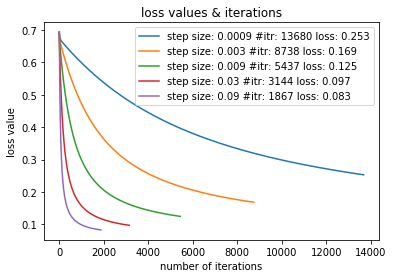

In [34]:
#plot the loss values with respect to iteration count
plt.plot(loss_values1)
plt.plot(loss_values2)
plt.plot(loss_values3)
plt.plot(loss_values4)
plt.plot(loss_values5)
plt.legend([
            "step size: " + str(step_size1) + " #itr: " + str(loss_values1.size) + " loss: " + "{:.3f}".format(loss_values1[loss_values1.size-1]), 
            "step size: " + str(step_size2) + " #itr: " + str(loss_values2.size) + " loss: " + "{:.3f}".format(loss_values2[loss_values2.size-1]),
            "step size: " + str(step_size3) + " #itr: " + str(loss_values3.size) + " loss: " + "{:.3f}".format(loss_values3[loss_values3.size-1]),
            "step size: " + str(step_size4) + " #itr: " + str(loss_values4.size) + " loss: " + "{:.3f}".format(loss_values4[loss_values4.size-1]),
            "step size: " + str(step_size5) + " #itr: " + str(loss_values5.size) + " loss: " + "{:.3f}".format(loss_values5[loss_values5.size-1])
])
plt.xlabel("number of iterations")
plt.ylabel("loss value")
plt.title("loss values & iterations")

In [35]:
#accuracy_function(x1,w_rep1_1,y) #to check accuracy for the logistic regression

In [36]:
#accuracy_function(x1,w_rep1_2,y)

In [37]:
#accuracy_function(x1,w_rep1_3,y)

In [38]:
#accuracy_function(x1,w_rep1_4,y)

In [39]:
#accuracy_function(x1,w_rep1_5,y)

**Representation 2**

In [40]:
#x2 matrix is created by concatenating 1's vector and training data for representation 2 ( [1 feature_1 feature_2] for one sample)
# 1561x3
x2 = np.concatenate((np.ones((1561,1)),training_data_rep2),axis = 1)
#y (label matrix) for representation 2 is same as y for representation 1
#initial w (weight matrix) for representation 2 is same as y for representation 1

In [41]:
#x2 #to check x2
#x2_test=np.concatenate((np.ones((424,1)),test_data_rep2),axis = 1)

In [42]:
#logistic regressions for each step size
w_rep2_1 , loss_values2_1 = logistic_regression(x2,w,y,step_size1,error_size)
w_rep2_2 , loss_values2_2 = logistic_regression(x2,w,y,step_size2,error_size)
w_rep2_3 , loss_values2_3 = logistic_regression(x2,w,y,step_size3,error_size)
w_rep2_4 , loss_values2_4 = logistic_regression(x2,w,y,step_size4,error_size)
w_rep2_5 , loss_values2_5 = logistic_regression(x2,w,y,step_size5,error_size)

Text(0.5, 1.0, 'loss values & iterations')

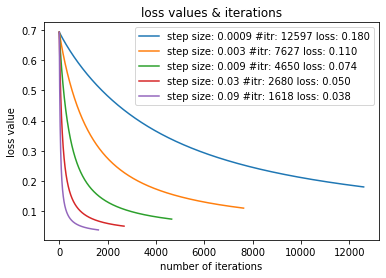

In [43]:
#plot the loss values with respect to iteration count
plt.plot(loss_values2_1)
plt.plot(loss_values2_2)
plt.plot(loss_values2_3)
plt.plot(loss_values2_4)
plt.plot(loss_values2_5)
plt.legend([
            "step size: " + str(step_size1) + " #itr: " + str(loss_values2_1.size) + " loss: " + "{:.3f}".format(loss_values2_1[loss_values2_1.size-1]), 
            "step size: " + str(step_size2) + " #itr: " + str(loss_values2_2.size) + " loss: " + "{:.3f}".format(loss_values2_2[loss_values2_2.size-1]),
            "step size: " + str(step_size3) + " #itr: " + str(loss_values2_3.size) + " loss: " + "{:.3f}".format(loss_values2_3[loss_values2_3.size-1]),
            "step size: " + str(step_size4) + " #itr: " + str(loss_values2_4.size) + " loss: " + "{:.3f}".format(loss_values2_4[loss_values2_4.size-1]),
            "step size: " + str(step_size5) + " #itr: " + str(loss_values2_5.size) + " loss: " + "{:.3f}".format(loss_values2_5[loss_values2_5.size-1])
])
plt.xlabel("number of iterations")
plt.ylabel("loss value")
plt.title("loss values & iterations")

In [44]:
#accuracy_function(x2,w_rep2_1,y) #to check accuracy for the logistic regression

In [45]:
#accuracy_function(x2,w_rep2_2,y)

In [46]:
#accuracy_function(x2,w_rep2_3,y)

In [47]:
#accuracy_function(x2,w_rep2_4,y)

In [48]:
#accuracy_function(x2,w_rep2_5,y)

## Task 2.2: Logistic Regression with Regularization

**(10 points)** Implement logistic regression with $\ell_2$ norm regularization, $||\mathbf{w}||_{2}^{2}$ . Show that your implementation is working by visualizing the loss over the iterations again. Visualization for a single learning rate and $\lambda$ suffices. 

### Function Definitions for Logistic Regression with Regularization

#### Logistic Loss Function with Regularization
\begin{equation}
     E(w) = \frac{1}{N}\sum_{i=1}^{N}\ln{(1+e^{-y_{n}w^{T}x_{n}})} + \frac{\lambda \| w\|^2}{2}
\end{equation}

In [49]:
#takes x(data), w(weight), y(label), lambda and return loss value.
def logistic_loss_function_reg(x,w,y,lamda):
    return np.mean(np.log(np.exp(np.multiply(-y,np.dot(x,w)))  + 1)) + lamda*np.dot(w.T,w)/(2) 

#### Gradient of Logistic Loss Function with Regularization
\begin{equation}
     \frac{\partial E(w)}{\partial w} = \frac{1}{N}\sum_{i=1}^{N} \frac{-y_{n}x_{n}e^{-y_{n}w^{T}x_{n}}}{1+e^{-y_{n}w^{T}x_{n}}} + \lambda w
     =\frac{1}{N}\sum_{i=1}^{N} \frac{-y_{n}x_{n}}{e^{y_{n}w^{T}x_{n}}+1} + \lambda w
    {\label{gradient}}
\end{equation}

In [50]:
#takes x(data), w(weight), y(label), lambda and return gradient vector. (the direction with the most increasing)
def gradient_loss_function_reg(x,w,y,lamba):
    return np.resize(np.mean(np.multiply(-y,x)/(np.exp(np.multiply(y,np.dot(x,w)))  + 1),0),(3,1)) + lamba*w

#### Logistic Regression Function with Regularization

In [51]:
#takes x(data), w(weight), y(label), lambda, step size(learning rate), error size(for the convergence) and 
#return last weight matrix, loss values vector for each iteration
def logistic_regression_reg(x,w,y,lamda,step_size,error_size):
    convergence_size = error_size + 1 #initialization of convergence size, assigned to a number higher than error_size
    temp_loss =  logistic_loss_function_reg(x,w,y,lamda) #temporary loss value for initial weight matrix
    loss_values = temp_loss #loss values vector is initialized and initial loss value is added to the vector#loss values vector is initialized and initial loss value is added to the vector
    while convergence_size > error_size: #while convergence is not enough
        grad = gradient_loss_function_reg(x,w,y,lamda) #gradient vector
        direction = -grad #minus gradient vector for the vector through the local minimum
        w = w + step_size*direction #minus gradient vector for the vector through the local minimum
        prev_loss = temp_loss #previous loss value is saved to check convergence before new loss value calculation 
        temp_loss = logistic_loss_function_reg(x,w,y,lamda) #new loss value after weight update at this iteration
        loss_values = np.append(loss_values,temp_loss) #new loss value is added to the loss value vector
        convergence_size = abs(prev_loss - temp_loss) #convergence size calculation
    return w,loss_values

In [52]:
#lambda values for the evaluations
lamdas = np.zeros((13,1))
lamdas[0] = 1
lamdas[1] = 0.5
lamdas[2] = 0.1
lamdas[3] = 0.05
lamdas[4] = 0.025
lamdas[5] = 0.01
lamdas[6] = 0.005
lamdas[7] = 0.0025
lamdas[8] = 0.001
lamdas[9] = 0.0005
lamdas[10] = 0.00025
lamdas[11] = 0.0001
lamdas[12] = 0.0

#error size
error_size = 0.00001
#step size
step_size = 0.09 #0.0009

### Representation 1

In [53]:
#logistic regressions with regularization for each lambda
w_rep1_reg1, loss_values_reg1 = logistic_regression_reg(x1,w,y,lamdas[0],step_size,error_size)
w_rep1_reg2, loss_values_reg2 = logistic_regression_reg(x1,w,y,lamdas[1],step_size,error_size)
w_rep1_reg3, loss_values_reg3 = logistic_regression_reg(x1,w,y,lamdas[2],step_size,error_size)
w_rep1_reg4, loss_values_reg4 = logistic_regression_reg(x1,w,y,lamdas[3],step_size,error_size)
w_rep1_reg5, loss_values_reg5 = logistic_regression_reg(x1,w,y,lamdas[4],step_size,error_size)
w_rep1_reg6, loss_values_reg6 = logistic_regression_reg(x1,w,y,lamdas[5],step_size,error_size)

Text(0.5, 1.0, 'loss values & iterations')

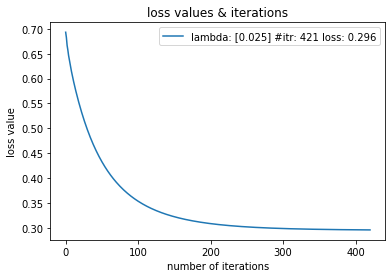

In [54]:
#plot the loss values with respect to iteration count

#plt.plot(loss_values_reg1)
#plt.plot(loss_values_reg2)
#plt.plot(loss_values_reg3)
#plt.plot(loss_values_reg4)
plt.plot(loss_values_reg5)
#plt.plot(loss_values_reg6)
plt.legend([
           # "lambda: " + str(lamdas[0]) + " #itr: " + str(loss_values_reg1.size) + " loss: " + "{:.3f}".format(loss_values_reg1[loss_values_reg1.size-1]), 
           # "lambda: " + str(lamdas[1]) + " #itr: " + str(loss_values_reg2.size) + " loss: " + "{:.3f}".format(loss_values_reg2[loss_values_reg2.size-1]),
           # "lambda: " + str(lamdas[2]) + " #itr: " + str(loss_values_reg3.size) + " loss: " + "{:.3f}".format(loss_values_reg3[loss_values_reg3.size-1]),
            #"lambda: " + str(lamdas[3]) + " #itr: " + str(loss_values_reg4.size) + " loss: " + "{:.3f}".format(loss_values_reg4[loss_values_reg4.size-1]),
            "lambda: " + str(lamdas[4]) + " #itr: " + str(loss_values_reg5.size) + " loss: " + "{:.3f}".format(loss_values_reg5[loss_values_reg5.size-1]),
            #"lambda: " + str(lamdas[5]) + " #itr: " + str(loss_values_reg6.size) + " loss: " + "{:.3f}".format(loss_values_reg6[loss_values_reg6.size-1])
           ])
plt.xlabel("number of iterations")
plt.ylabel("loss value")
plt.title("loss values & iterations")
#plt.xscale("log")

In [55]:
#accuracy_function(x1,w_rep1_reg1,y)

In [56]:
#accuracy_function(x1,w_rep1_reg2,y)

In [57]:
#accuracy_function(x1,w_rep1_reg3,y)

In [58]:
#accuracy_function(x1,w_rep1_reg4,y)

In [59]:
accuracy_function(x1,w_rep1_reg5,y)

array([0.97245356])

In [60]:
#accuracy_function(x1,w_rep1_reg6,y)

### Representation 2

In [61]:
#logistic regressions with regularization for each lambda
w_rep2_reg1, loss_values_reg2_1 = logistic_regression_reg(x2,w,y,lamdas[0],step_size,error_size)
w_rep2_reg2, loss_values_reg2_2 = logistic_regression_reg(x2,w,y,lamdas[1],step_size,error_size)
w_rep2_reg3, loss_values_reg2_3 = logistic_regression_reg(x2,w,y,lamdas[2],step_size,error_size)
w_rep2_reg4, loss_values_reg2_4 = logistic_regression_reg(x2,w,y,lamdas[3],step_size,error_size)
w_rep2_reg5, loss_values_reg2_5 = logistic_regression_reg(x2,w,y,lamdas[4],step_size,error_size)
w_rep2_reg6, loss_values_reg2_6 = logistic_regression_reg(x2,w,y,lamdas[5],step_size,error_size)

Text(0.5, 1.0, 'loss values & iterations')

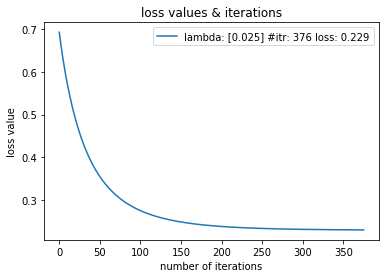

In [62]:
#plot the loss values with respect to iteration count

#plt.plot(loss_values_reg2_1)
#plt.plot(loss_values_reg2_2)
#plt.plot(loss_values_reg2_3)
#plt.plot(loss_values_reg2_4)
plt.plot(loss_values_reg2_5)
#plt.plot(loss_values_reg2_6)
plt.legend([
           # "lambda: " + str(lamdas[0]) + " #itr: " + str(loss_values_reg2_1.size) + " loss: " + "{:.3f}".format(loss_values_reg2_1[loss_values_reg2_1.size-1]), 
            #"lambda: " + str(lamdas[1]) + " #itr: " + str(loss_values_reg2_2.size) + " loss: " + "{:.3f}".format(loss_values_reg2_2[loss_values_reg2_2.size-1]),
            #"lambda: " + str(lamdas[2]) + " #itr: " + str(loss_values_reg2_3.size) + " loss: " + "{:.3f}".format(loss_values_reg2_3[loss_values_reg2_3.size-1]),
            #"lambda: " + str(lamdas[3]) + " #itr: " + str(loss_values_reg2_4.size) + " loss: " + "{:.3f}".format(loss_values_reg2_4[loss_values_reg2_4.size-1]),
            "lambda: " + str(lamdas[4]) + " #itr: " + str(loss_values_reg2_5.size) + " loss: " + "{:.3f}".format(loss_values_reg2_5[loss_values_reg2_5.size-1]),
            #"lambda: " + str(lamdas[5]) + " #itr: " + str(loss_values_reg2_6.size) + " loss: " + "{:.3f}".format(loss_values_reg2_6[loss_values_reg2_6.size-1])
           ])
plt.xlabel("number of iterations")
plt.ylabel("loss value")
plt.title("loss values & iterations")
#plt.xscale("log")

## Task 2.3: 5-Fold Cross Validation

**(10 points)** Implement a 5-fold cross validation procedure to find the optimal $\lambda$ value for both Representation 1 and 2. Experiment with at least three different $\lambda$ values between 0 and 1. Report the mean/std of cross validation accuracy of every representation/parameter combination as a table and clearly mark the best configuration in your report. 

### Cross Validation Function

In [63]:
#takes x(training data), w(weight matrix), y(label matrix), lambda vector, step size, error size
#firstly, training data and label matrix are shuffled for randomness
#secondly, training data and label matrix are split to 5 fold:
#          one of them is test data  and four of them is combined for the training data
#          there are 5 cases where one fold is test data(kfold_test_data_vector[i]) 
#                                    and merged 4 fold (kfold_train_data_vector[i])is training data 
#thirdly, for each case and for each lambda, the accuracy matrices and final loss value matrices are calculated. 
#return accuracy matrix for test data and training data, loss matrix for test data and training data, orderly.

def cross_validation_function(x,w,y,lamdas,step_size,error_size):
    shuffle = np.random.permutation(1561)
    shuffled_x=x[shuffle,:]
    shuffled_y=y[shuffle]
    folds_trainx=np.array_split(shuffled_x,5)#shuffled and split x data
    folds_trainy=np.array_split(shuffled_y,5)#shuffled and split y
    kfold_test_data_vector = []#test data vector for 5 test cases
    kfold_test_label_vector = []#label vector for 5 test cases
    for i in range (5):
        kfold_test_data_vector.append(folds_trainx[i])#each part of shuffled x data is appended to test data vector
        kfold_test_label_vector.append(folds_trainy[i])#each part of shuffled y is appended to test label vector

    kfold_train_data_vector = []#training data vector for 5 training cases
    kfold_train_label_vector = []#label vector for 5 training cases

    for i in range (5):
        temp_data_vector = []#to merge other 4 data folds 
        temp_label_vector = []#to merge other 4 label folds 
        for j in range (5):
            if i != j: #if the fold is not the test fold, merge it 
                temp_data_vector.extend(kfold_test_data_vector[j]) #merged 4 data folds (training data for cross validation)
                temp_label_vector.extend(kfold_test_label_vector[j]) #merged 4 label folds (training label for cross validation)
        kfold_train_data_vector.append(temp_data_vector)#training data is appended to training data vector
        kfold_train_label_vector.append(temp_label_vector)#training label is appended to training label vector

    #initialization of matrices
    accuracy_matrix_test = np.zeros((lamdas.size,5))
    accuracy_matrix_training = np.zeros((lamdas.size,5))
    loss_matrix_test = np.zeros((lamdas.size,5))
    loss_matrix_training = np.zeros((lamdas.size,5))

    for i in range (lamdas.size):#for each lambda
        for k in range (5):#for each case(5 folds - 5 cases)
            #calculates weight matrix using logistic regression function with regularization
            temp_w, temp_loss_values = logistic_regression_reg(np.array(kfold_train_data_vector[k]),w,np.array(kfold_train_label_vector[k]),lamdas[i],step_size,error_size)
            #calculates accuracy and loss value matrices for lambda i and case k using accuracy and loss function
            accuracy_matrix_test[i][k] = accuracy_function(np.array(kfold_test_data_vector[k]),temp_w,np.array(kfold_test_label_vector[k]))
            accuracy_matrix_training[i][k] = accuracy_function(np.array(kfold_train_data_vector[k]),temp_w,np.array(kfold_train_label_vector[k]))
            loss_matrix_test[i][k] = logistic_loss_function(np.array(kfold_test_data_vector[k]),temp_w,np.array(kfold_test_label_vector[k]))
            loss_matrix_training[i][k] = logistic_loss_function(np.array(kfold_train_data_vector[k]),temp_w,np.array(kfold_train_label_vector[k]))
    
    return accuracy_matrix_test, accuracy_matrix_training, loss_matrix_test, loss_matrix_training

### Representation1

In [64]:
#5-fold cross validation for representation 1 
np.random.seed(1)
accuracy_matrix_test1, accuracy_matrix_training1, loss_matrix_test1, loss_matrix_training1 = cross_validation_function(x1,w,y,lamdas,step_size,error_size)

In [65]:
#accuracy_matrix_test1 #to check accuracy matrix

In [66]:
#loss_matrix_test1

In [67]:
#average and standard deviation calculations
lamdas_test_accuracy_mean_rep1 = np.mean(accuracy_matrix_test1, axis=1)
lamdas_training_accuracy_mean_rep1 = np.mean(accuracy_matrix_training1, axis=1)

lamdas_test_accuracy_std_rep1 = np.std(accuracy_matrix_test1, axis=1)
lamdas_training_accuracy_std_rep1 = np.std(accuracy_matrix_training1, axis=1)

lamdas_test_loss_mean_rep1 = np.mean(loss_matrix_test1, axis=1)
lamdas_training_loss_mean_rep1 = np.mean(loss_matrix_training1, axis=1)


**Table of the Mean/Std of Cross Validation Accuracy for Representation 1**

In [68]:
print ("%s:\t\t\t%s\t\t%s" % ('lambdas', 'accuracy mean', 'accuracy std'))
print ("%s\t\t\t%s\t\t%s" % ('--------', '-------------', '------------'))
for i in range(lamdas.size):
       print ("%f:\t\t\t%f\t\t%f" % (lamdas[i], lamdas_test_accuracy_mean_rep1[i], lamdas_test_accuracy_std_rep1[i]))


lambdas:			accuracy mean		accuracy std
--------			-------------		------------
1.000000:			0.701475		0.026054
0.500000:			0.858411		0.015853
0.100000:			0.961555		0.008860
0.050000:			0.967322		0.008712
0.025000:			0.972452		0.005950
0.010000:			0.975018		0.005114
0.005000:			0.975018		0.005114
0.002500:			0.973738		0.005105
0.001000:			0.975662		0.005178
0.000500:			0.976303		0.004761
0.000250:			0.975662		0.004764
0.000100:			0.975662		0.004764
0.000000:			0.975662		0.004764


**Plot of the Mean of Cross Validation Accuracy for Representation 1**

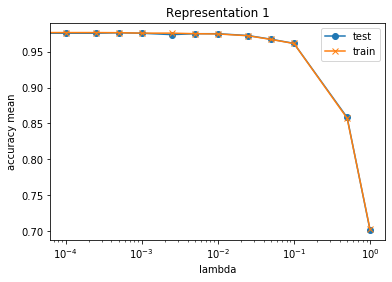

In [69]:
plt.plot(lamdas,lamdas_test_accuracy_mean_rep1,marker='o')
plt.plot(lamdas,lamdas_training_accuracy_mean_rep1,marker='x')
plt.xlabel("lambda")
plt.ylabel("accuracy mean")
plt.title("Representation 1")
plt.xscale("log")
plt.legend(["test","train"])

**Plot of the Std  of Cross Validation Accuracy for Representation 1**

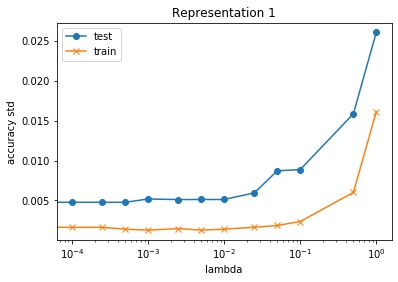

In [70]:
plt.plot(lamdas,lamdas_test_accuracy_std_rep1,marker='o')
plt.plot(lamdas,lamdas_training_accuracy_std_rep1,marker='x')
plt.xlabel("lambda")
plt.ylabel("accuracy std")
plt.title("Representation 1")
plt.xscale("log")
plt.legend(["test","train"])

**Plot of the Mean of Cross Validation Loss Values for Representation 1**

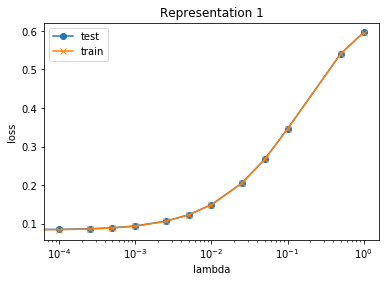

In [71]:
plt.plot(lamdas,lamdas_test_loss_mean_rep1,marker='o')
plt.plot(lamdas,lamdas_training_loss_mean_rep1,marker='x')
plt.xlabel("lambda")
plt.ylabel("loss")
plt.title("Representation 1")
plt.xscale("log")
plt.legend(["test","train"])

### Representation 2

In [72]:
#5-fold cross validation for representation 2
np.random.seed(1)
accuracy_matrix_test2, accuracy_matrix_training2, loss_matrix_test2, loss_matrix_training2 = cross_validation_function(x2,w,y,lamdas,step_size,error_size)

In [73]:
accuracy_matrix_test2

array([[0.99361022, 0.99038462, 1.        , 0.99038462, 0.98717949],
       [0.99361022, 0.99358974, 1.        , 1.        , 0.99358974],
       [0.99680511, 0.98717949, 1.        , 1.        , 0.99038462],
       [0.99680511, 0.98717949, 1.        , 0.99679487, 0.99038462],
       [0.99680511, 0.98397436, 1.        , 0.99679487, 0.98717949],
       [0.99680511, 0.98717949, 1.        , 0.99679487, 0.99038462],
       [0.99680511, 0.98717949, 1.        , 0.99679487, 0.99038462],
       [0.99680511, 0.98717949, 1.        , 0.99679487, 0.99038462],
       [0.99680511, 0.98397436, 1.        , 1.        , 0.99038462],
       [0.99680511, 0.98717949, 1.        , 1.        , 0.99038462],
       [0.99680511, 0.98717949, 1.        , 1.        , 0.99038462],
       [0.99680511, 0.98717949, 1.        , 1.        , 0.99038462],
       [0.99680511, 0.98717949, 1.        , 1.        , 0.99038462]])

In [74]:
#loss_matrix_test2

In [75]:
#average and standard deviation calculations
lamdas_test_accuracy_mean_rep2 = np.mean(accuracy_matrix_test2, axis=1)
lamdas_training_accuracy_mean_rep2 = np.mean(accuracy_matrix_training2, axis=1)

lamdas_test_accuracy_std_rep2 = np.std(accuracy_matrix_test2, axis=1)
lamdas_training_accuracy_std_rep2 = np.std(accuracy_matrix_training2, axis=1)

lamdas_test_loss_mean_rep2 = np.mean(loss_matrix_test2, axis=1)
lamdas_training_loss_mean_rep2 = np.mean(loss_matrix_training2, axis=1)

**Table of the Mean/Std of Cross Validation Accuracy for Representation 2**

In [76]:
print ("%s:\t\t\t%s\t\t%s" % ('lambdas', 'accuracy mean', 'accuracy std'))
for i in range(lamdas.size):
       print ("%f:\t\t\t%f\t\t%f" % (lamdas[i], lamdas_test_accuracy_mean_rep2[i], lamdas_test_accuracy_std_rep2[i]))

lambdas:			accuracy mean		accuracy std
1.000000:			0.992312		0.004349
0.500000:			0.996158		0.003137
0.100000:			0.994874		0.005208
0.050000:			0.994233		0.004712
0.025000:			0.992951		0.006216
0.010000:			0.994233		0.004712
0.005000:			0.994233		0.004712
0.002500:			0.994233		0.004712
0.001000:			0.994233		0.006216
0.000500:			0.994874		0.005208
0.000250:			0.994874		0.005208
0.000100:			0.994874		0.005208
0.000000:			0.994874		0.005208


**Plot of the Mean of Cross Validation Accuracy for Representation 2**

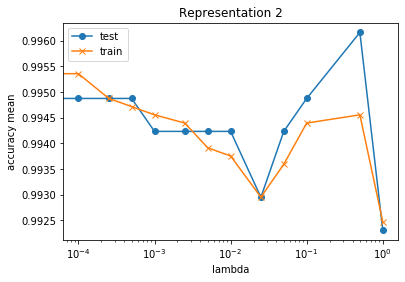

In [77]:
plt.plot(lamdas,lamdas_test_accuracy_mean_rep2,marker='o')
plt.plot(lamdas,lamdas_training_accuracy_mean_rep2,marker='x')
plt.xlabel("lambda")
plt.ylabel("accuracy mean")
plt.title("Representation 2")
plt.xscale("log")
plt.legend(["test","train"])

**Plot of the Std  of Cross Validation Accuracy for Representation 2**

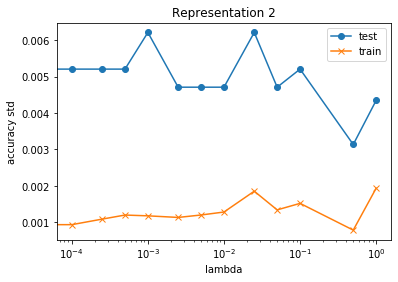

In [78]:
plt.plot(lamdas,lamdas_test_accuracy_std_rep2,marker='o')
plt.plot(lamdas,lamdas_training_accuracy_std_rep2,marker='x')
plt.xlabel("lambda")
plt.ylabel("accuracy std")
plt.title("Representation 2")
plt.xscale("log")
plt.legend(["test","train"])

**Plot of the Mean of Cross Validation Loss Values for Representation 2**

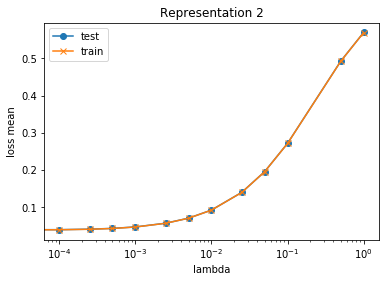

In [79]:
plt.plot(lamdas,lamdas_test_loss_mean_rep2,marker='o')
plt.plot(lamdas,lamdas_training_loss_mean_rep2,marker='x')
plt.xlabel("lambda")
plt.ylabel("loss mean")
plt.title("Representation 2")
plt.xscale("log")
plt.legend(["test","train"])

# Task 3: Evaluation (25 Pts)

**(5 points)** Train the logistic regression classifier on Representation 1 and 2 with the best learning rate you decide. Similarly, train the regularized logistic regression classifier with the best $\lambda$ you obtained by 5-fold cross validation. Report the training and test classification accuracy as 
\begin{align*}
\frac{\text{number of correctly classified samples}}{\text{total number of samples}}x100
\end{align*}

## Representation 1

In [80]:
#test data and label for representation 1
x_test1 = np.concatenate((np.ones((424,1)),test_data_rep1),axis = 1)
y_test = np.resize(test_label,(424,1))

eval_lamdas = np.zeros((6,1))
eval_lamdas = lamdas[0:6:1]

**Best Step Size without Regularization**

In [81]:
#best solution without regularization for representation 1
#step size: 0.09
w_best_stepsize_rep1 , loss_values_best_stepsize_rep1 = logistic_regression(x1,w,y,0.09,error_size)
accuracy_best_stepsize_rep1 = accuracy_function(x_test1,w_best_stepsize_rep1,y_test)
#test accuracy
accuracy_best_stepsize_rep1*100

array([95.04716981])

In [82]:
#training accuracy
accuracy_best_stepsize_rep1_training=accuracy_function(x1,w_best_stepsize_rep1,y)
accuracy_best_stepsize_rep1_training*100

array([97.69378603])

**Best Lambda with Regularization**

In [83]:
#best solution with regularization for representation 1
#lambda : 0.0001
w_best_lambda_rep1, loss_values_best_lambda_rep1 = logistic_regression_reg(x1,w,y,0.000500,0.09,error_size)
accuracy_best_lambda_rep1 = accuracy_function(x_test1,w_best_lambda_rep1,y_test)
#test accuracy
accuracy_best_lambda_rep1*100



array([94.81132075])

In [84]:
#training accuracy 
accuracy_best_lambda_rep1_training=accuracy_function(x1,w_best_lambda_rep1,y)
accuracy_best_lambda_rep1_training*100

array([97.62972454])

**Step Size-Accuracy Evaluation for Test Data**

In [85]:
accuracy_array_rep1 = np.zeros((5,1))
accuracy_array_rep1[0] = accuracy_function(x_test1,w_rep1_1,y_test)
accuracy_array_rep1[1] = accuracy_function(x_test1,w_rep1_2,y_test)
accuracy_array_rep1[2] = accuracy_function(x_test1,w_rep1_3,y_test)
accuracy_array_rep1[3] = accuracy_function(x_test1,w_rep1_4,y_test)
accuracy_array_rep1[4] = accuracy_function(x_test1,w_rep1_5,y_test)

In [86]:
accuracy_array_rep1

array([[0.93396226],
       [0.94339623],
       [0.9504717 ],
       [0.94575472],
       [0.9504717 ]])

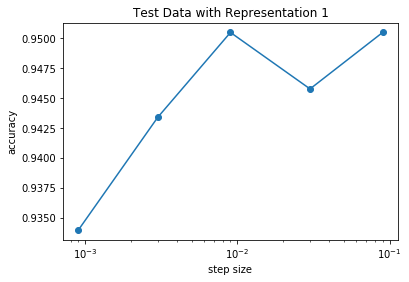

In [87]:
plt.plot(step_sizes,accuracy_array_rep1,marker='o')
plt.xlabel("step size")
plt.ylabel("accuracy")
plt.title("Test Data with Representation 1")
plt.xscale("log")

**Lambda-Accuracy Evaluation for Test Data**

In [88]:
accuracy_array_rep1_reg = np.zeros((6,1))
accuracy_array_rep1_reg[0] = accuracy_function(x_test1,w_rep1_reg1,y_test)
accuracy_array_rep1_reg[1] = accuracy_function(x_test1,w_rep1_reg2,y_test)
accuracy_array_rep1_reg[2] = accuracy_function(x_test1,w_rep1_reg3,y_test)
accuracy_array_rep1_reg[3] = accuracy_function(x_test1,w_rep1_reg4,y_test)
accuracy_array_rep1_reg[4] = accuracy_function(x_test1,w_rep1_reg5,y_test)
accuracy_array_rep1_reg[5] = accuracy_function(x_test1,w_rep1_reg6,y_test)

In [89]:
accuracy_array_rep1_reg

array([[0.71933962],
       [0.84433962],
       [0.91981132],
       [0.93396226],
       [0.94103774],
       [0.9504717 ]])

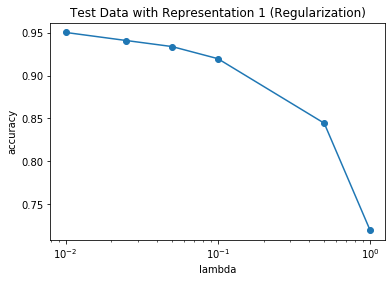

In [90]:
plt.plot(eval_lamdas,accuracy_array_rep1_reg,marker='o')
plt.xlabel("lambda")
plt.ylabel("accuracy")
plt.title("Test Data with Representation 1 (Regularization)")
plt.xscale("log")

## Representation 2

In [91]:
#test data for representation 2
x_test2 = np.concatenate((np.ones((424,1)),test_data_rep2),axis = 1)

**Best Step Size without Regularization**

In [92]:
#solution for rep2
#step size: 0.09
w_best_stepsize_rep2 , loss_values_best_stepsize_rep2 = logistic_regression(x2,w,y,0.09,error_size)
accuracy_best_stepsize_rep2 = accuracy_function(x_test2,w_best_stepsize_rep2,y_test)
#test accuracy
accuracy_best_stepsize_rep2*100


array([97.16981132])

In [93]:
#training accuracy
accuracy_best_stepsize_rep2_training=accuracy_function(x2,w_best_stepsize_rep2,y)
accuracy_best_stepsize_rep2_training*100

array([99.55156951])

**Best Lambda with Regularization**

In [94]:
#best solution with regularization for representation 1
#lambda : 0.25
w_best_lambda_rep2, loss_values_best_lambda_rep2 = logistic_regression_reg(x2,w,y,0.5,0.09,error_size)
accuracy_best_lambda_rep2 = accuracy_function(x_test2,w_best_lambda_rep2,y_test)
#test accuracy
accuracy_best_lambda_rep2*100





array([97.64150943])

In [95]:
#training accuracy
accuracy_best_lambda_rep2_training=accuracy_function(x2,w_best_lambda_rep2,y)
accuracy_best_lambda_rep2_training*100

array([99.48750801])

**Step Size-Accuracy Evaluation for Test Data**

In [96]:
accuracy_array_rep2 = np.zeros((5,1))
accuracy_array_rep2[0] = accuracy_function(x_test2,w_rep2_1,y_test)
accuracy_array_rep2[1] = accuracy_function(x_test2,w_rep2_2,y_test)
accuracy_array_rep2[2] = accuracy_function(x_test2,w_rep2_3,y_test)
accuracy_array_rep2[3] = accuracy_function(x_test2,w_rep2_4,y_test)
accuracy_array_rep2[4] = accuracy_function(x_test2,w_rep2_5,y_test)

In [97]:
accuracy_array_rep2

array([[0.96933962],
       [0.96933962],
       [0.96933962],
       [0.96933962],
       [0.97169811]])

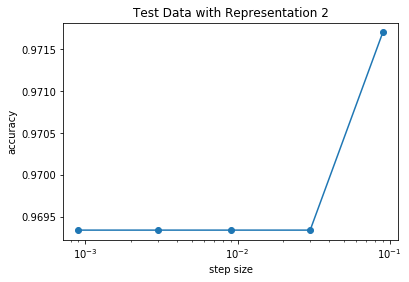

In [98]:
plt.plot(step_sizes,accuracy_array_rep2,marker='o')
plt.xlabel("step size")
plt.ylabel("accuracy")
plt.title("Test Data with Representation 2")
plt.xscale("log")

**Lambda-Accuracy Evaluation for Test Data**

In [99]:
accuracy_array_rep2_reg = np.zeros((6,1))
accuracy_array_rep2_reg[0] = accuracy_function(x_test2,w_rep2_reg1,y_test)
accuracy_array_rep2_reg[1] = accuracy_function(x_test2,w_rep2_reg2,y_test)
accuracy_array_rep2_reg[2] = accuracy_function(x_test2,w_rep2_reg3,y_test)
accuracy_array_rep2_reg[3] = accuracy_function(x_test2,w_rep2_reg4,y_test)
accuracy_array_rep2_reg[4] = accuracy_function(x_test2,w_rep2_reg5,y_test)
accuracy_array_rep2_reg[5] = accuracy_function(x_test2,w_rep2_reg6,y_test)

In [100]:
accuracy_array_rep2_reg

array([[0.97169811],
       [0.97641509],
       [0.96933962],
       [0.96933962],
       [0.96933962],
       [0.96933962]])

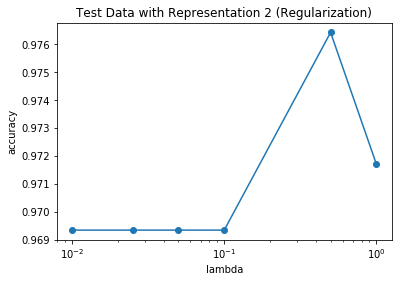

In [101]:
plt.plot(eval_lamdas,accuracy_array_rep2_reg,marker='o')
plt.xlabel("lambda")
plt.ylabel("accuracy")
plt.title("Test Data with Representation 2 (Regularization)")
plt.xscale("log")

## Decision Boundary

**(15 points)** Visualize the decision boundary (the line that is given by $\mathbf{w}^{T}x=0$) obtained from the logistic regression classifier learned without regularization. For this purpose, use only Representation 1. Provide two scatter plots for training and test data points with the decision boundary shown on each of the plots.

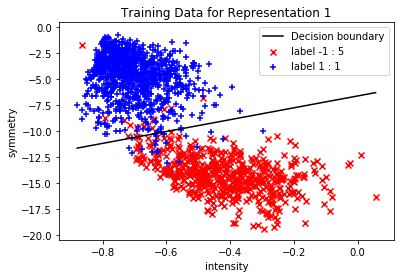

In [102]:
pointa = [training_data_mean.min(),(-w_best_stepsize_rep1[1]/w_best_stepsize_rep1[2])*(training_data_mean.min())-(w_best_stepsize_rep1[0]/w_best_stepsize_rep1[2])]
pointb = [training_data_mean.max(),(-w_best_stepsize_rep1[1]/w_best_stepsize_rep1[2])*(training_data_mean.max())-(w_best_stepsize_rep1[0]/w_best_stepsize_rep1[2])]

x_values2 = [pointa[0], pointb[0]]
y_values2 = [pointa[1], pointb[1]]
plt.plot(x_values2, y_values2,color="black")
plt.scatter(training_data_mean[training_label==-1],training_data_sym[training_label==-1],marker='x',color='red')
plt.scatter(training_data_mean[training_label==1],training_data_sym[training_label==1],marker='+',color='blue')
plt.xlabel("intensity")
plt.ylabel("symmetry")
plt.title("Training Data for Representation 1")
plt.legend(["Decision boundary","label -1 : 5","label 1 : 1"])

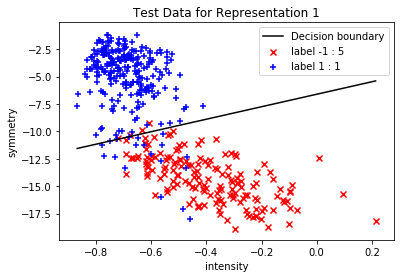

In [103]:
pointa = [test_data_mean.min(),(-w_best_stepsize_rep1[1]/w_best_stepsize_rep1[2])*(test_data_mean.min())-(w_best_stepsize_rep1[0]/w_best_stepsize_rep1[2])]
pointb = [test_data_mean.max(),(-w_best_stepsize_rep1[1]/w_best_stepsize_rep1[2])*(test_data_mean.max())-(w_best_stepsize_rep1[0]/w_best_stepsize_rep1[2])]

x_values2 = [pointa[0], pointb[0]]
y_values2 = [pointa[1], pointb[1]]
plt.plot(x_values2, y_values2,color="black")
plt.scatter(test_data_mean[test_label==-1],test_data_sym[test_label==-1],marker='x',color='red')
plt.scatter(test_data_mean[test_label==1],test_data_sym[test_label==1],marker='+',color='blue')
plt.xlabel("intensity")
plt.ylabel("symmetry")
plt.title("Test Data for Representation 1")
plt.legend(["Decision boundary","label -1 : 5","label 1 : 1"])

**(5 points)** Comment on your work in your report. Include the answers for the following questions in your discussion. 

* Did regularization improve the generalization performance (did it help reducing the gap between training and test accuracies/errors)? Did you observe any difference between using Representation 1 and 2?
* Which feature set did give the best results? Which one is more discriminative?
* What would be your next step to improve test accuracy? 

First comment: For Representation 1 it did not improve test accuracy because the features are not really discriminative. Also it did not reduce the gap . However, for the Representation 2 it increased test accuracy at the same time it decreased the gap between training and test accuracies.


Second comment: Representation 2 gave better results in comparison to Representation 1. We can observe that from test accuracies from the corresponding Represenation plots. Representation 2 is more discriminative.

Third comment: We can add more features so that our representations will be more discriminative. we can add more data points so that our model can see more 
cases. We can conduct error analysis. We can look at the misclassified examples and try to identify the wrongly labeled images and focus on that problem. For example, if one images are more misclassified we can try to add a new feature to solve this issue.